## [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.

* Commonly use a sub-library called [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
* The Jupyter Notebook will render plots inline if we ask it to using a "magic" command.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

* Simple plots are then (fairly) simple to create.

Text(0, 0.5, 'Position (km)')

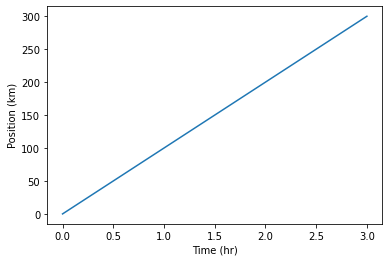

In [2]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

## Plot data directly from a [`Pandas dataframe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

* We can also plot [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
* This implicitly uses [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
* Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values

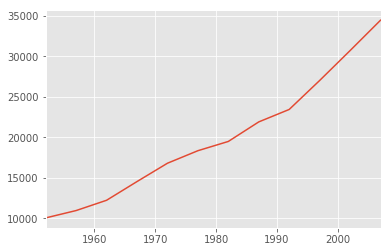

In [67]:
import pandas

data = pandas.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

# Extract year from last 4 characters of each column name
years = data.columns.str.strip('gdpPercap_')
# Convert year values to integers, saving results back to dataframe
data.columns = years.astype(int)

data.loc['Australia'].plot()

## Select and transform data, then plot it.

* By default, [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) plots with the rows as the X axis.
* We can transpose the data in order to plot multiple series.

Text(0, 0.5, 'GDP per capita')

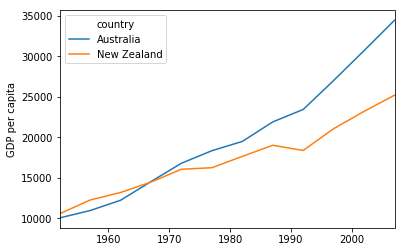

In [51]:
data.T.plot()
plt.ylabel('GDP per capita')

## Many styles of plot are available.

* For example, do a bar plot using a fancier style.

Text(0, 0.5, 'GDP per capita')

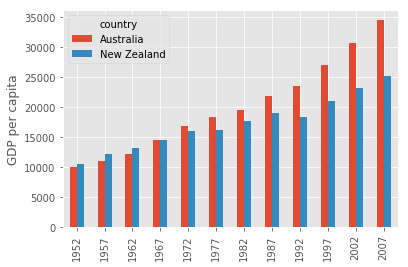

In [52]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

## Data can also be plotted by calling the `matplotlib` `plot` function directly.

* The command is `plt.plot(x, y)`
* The color / format of markers can also be specified as an optical argument: e.g. 'b-' is a blue line, 'g--' is a green dashed line.

## Get Australia data from dataframe

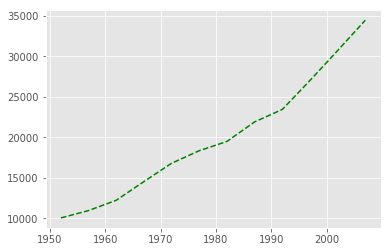

In [53]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')

## Can plot many sets of data together.

Text(0, 0.5, 'GDP per capita ($)')

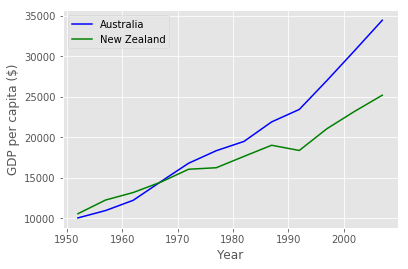

In [54]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

* Plot a scatter plot correlating the GDP of Australia and New Zealand
* Use either `plt.scatter` or `DataFrame.plot.scatter`

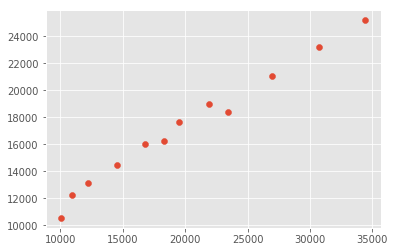

In [55]:
plt.scatter(gdp_australia, gdp_nz)

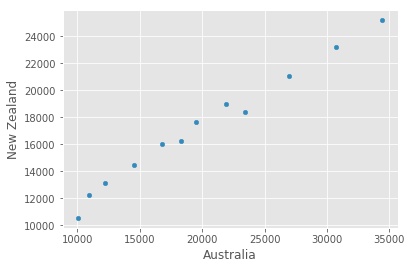

In [57]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

## Adding a Legend

Often when plotting multiple datasets on the same figure it is desirable to have 
a legend describing the data. This can be done in `matplotlib` in two stages:

Provide a label for each dataset in the figure:

In [ ]:
plt.plot(years, gdp_australia, label='Australia')
plt.plot(years, gdp_nz, label='New Zealand')

Instruct `matplotlib` to create the legend.

In [ ]:
plt.legend()

By default matplotlib will attempt to place the legend in a suitable position. If you would rather specify a position this can be done with the `loc=` argument, e.g to place the legend in the upper left corner of the plot, specify `loc='upper left'`

## Saving your plot to a file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the matplotlib.pyplot module that accomplishes this: [savefig](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html). Calling this function, e.g. with

`plt.savefig('my_figure.png')`

will save the current figure to the file `my_figure.png`. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

Note that functions in `plt` refer to a global figure variable and after a figure has been displayed to the screen (e.g. with `plt.show`) matplotlib will make this variable refer to a new empty figure. Therefore, make sure you call `plt.savefig` before the plot is displayed to the screen, otherwise you may find a file with an empty plot.

When using dataframes, data is often generated and plotted to screen in one line, and `plt.savefig` seems not to be a possible approach. One possibility to save the figure to file is then to

* save a reference to the current figure in a local variable (with `plt.gcf`)
* call the `savefig` class method from that varible.

`fig = plt.gcf() # get current figure
data.plot(kind='bar')
fig.savefig('my_figure.png')`

## Making your plots accessible

Whenever you are generating plots to go into a paper or a presentation, there are a few things you can do to make sure that everyone can understand your plots.

Always make sure your text is large enough to read. Use the `fontsize` parameter in `xlabel`, `ylabel`, `title`, and `legend`, and [`tick_params` with `labelsize`](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html) to increase the text size of the numbers on your axes.

Similarly, you should make your graph elements easy to see. Use `s` to increase the size of your scatterplot markers and `linewidth` to increase the sizes of your plot lines.

Using color (and nothing else) to distinguish between different plot elements will make your plots unreadable to anyone who is colorblind, or who happens to have a black-and-white office printer. For lines, the `linestyle` parameter lets you use different types of lines. For scatterplots, `marker` lets you change the shape of your points. If you're unsure about your colors, you can use [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) or [Color Oracle](https://colororacle.org/) to simulate what your plots would look like to those with colorblindness.

## Questions

### Q1: Minima and Maxima

Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Europe. Modify it again to plot the maximum GDP per capita over time for Europe.

In [ ]:
data_europe = pandas.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.____.plot(label='min')
data_europe.____
plt.legend(loc='best')
plt.xticks(rotation=90

##### Solution

In [ ]:
%load solutions/080_solution_01.py

### Q2: Correlations

Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?

`data_asia = pandas.read_csv('data/gapminder_gdp_asia.csv, index_col='country')
data_asia.describe() .T.plot(kind='scatter', x='min', y='max')` 

You might note that the variability in the maximum is much higher than that of the minimum. Take a look at the maximum and the max indexes:

In [ ]:
data_asia = pandas.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot()
print(data_asia.idxmax())
print(data_asia.idxmin())

##### Solution

In [ ]:
%load solutions/080_solution_02.py

### Q3: More Correlations

This short program creates a plot showing the correlation between GDP and life expectancy for 2007, normalizing marker size by population:

In [ ]:
data_all - pandas.read.csv9'../data/gpaminder_all.csv', index-col -'country'
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
             s=data_all['pop_2007']/1e6)

Using online help and other resources, explain what each argument to `plot` does.

##### Solution

In [1]:
%load solutions/080_solution_03.py